In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy 

In [2]:
def sqmat2vec(sqmat, upperORlower='upper'):
    """
    extracts the upper or lower triangular part of a square matrix and return as a vector

    """

    if upperORlower == 'upper':
        coords = np.where(np.triu(np.ones(sqmat.shape), k=1) > 0)
    else:
        coords = np.where(np.tril(np.ones(sqmat.shape), k=1) > 0)

    vec = sqmat[coords]
    return vec

In [3]:
K1 = 15     # conditions for projection 1 
K2 = 5     # conditions for projection 2  
N = 300     # number of trials
P = 100     # number of channels
n_simulations = 50 

In [4]:
np.random.seed(0) 
trial_types_A = np.random.randint(0, K1, N) 
A = np.zeros((K1, N))
for i in np.arange(K1): 
    A[i, trial_types_A == i] = 1 

trial_types_B = np.random.randint(0, K2, N) 
B = np.zeros((K2, N))
for i in np.arange(K2):
    B[i, trial_types_B == i] = 1  

In [5]:
np.unique(trial_types_A, return_counts=True) 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 array([23, 13, 20, 34, 21, 19, 17, 17, 26, 23, 15, 21, 12, 20, 19]))

In [6]:
np.unique(trial_types_B, return_counts=True) 

(array([0, 1, 2, 3, 4]), array([55, 61, 56, 67, 61]))

In [7]:
sigma = np.random.randn(P, P)
sigma = sigma ** 2

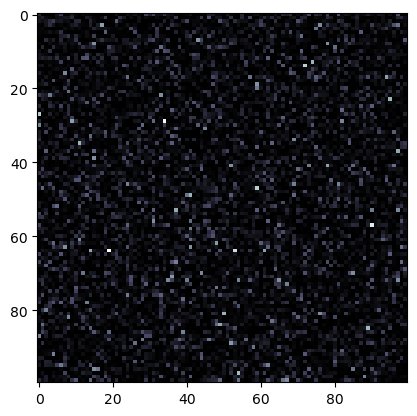

In [8]:
plt.imshow(sigma, cmap='bone')

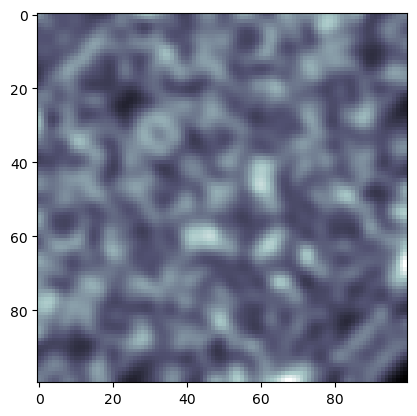

In [9]:
sigma = scipy.ndimage.gaussian_filter(sigma, 2)
# sigma = sigma.T @ sigma 
sigma = (sigma + sigma.T) / 2
plt.imshow(sigma, cmap='bone')

In [10]:
M = np.real(scipy.linalg.sqrtm(sigma))

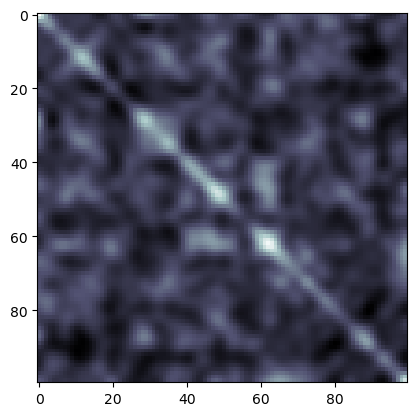

In [11]:
plt.imshow(M.T @ M, cmap='bone') 

In [12]:
AY1_AY2 = [] 
AY1_BY1 = [] 
AY1_BY2 = [] 
AY2_BY2 = []
BY1_BY2 = [] 
BY1_AY2 = [] 
no_projections = [] 

for simI in np.arange(n_simulations):
    sigma = 10 * np.random.randn(P, P) 
    sigma = sigma ** 2
    sigma = scipy.ndimage.gaussian_filter(sigma, 2)
    sigma = (sigma + sigma.T) / 2 
    M = np.real(scipy.linalg.sqrtm(sigma))

    trial_types_A = np.random.randint(0, K1, N) 
    A = np.zeros((K1, N))
    for i in np.arange(K1): 
        A[i, trial_types_A == i] = 1
    A /= np.sum(A, axis=1, keepdims=True)

    trial_types_B = np.random.randint(0, K2, N) 
    B = np.zeros((K2, N))
    for i in np.arange(K2):
        B[i, trial_types_B == i] = 1 
    B /= np.sum(B, axis=1, keepdims=True)

    
    y1 = np.random.randn(N, P) @ M 
    y2 = np.random.randn(N, P) @ M

    # y1 = np.random.randn(N, P) 
    # y2 = np.random.randn(N, P)
    
    topo1 = np.corrcoef((y1 - y1.mean(axis=0, keepdims=True)).T) 
    topo2 = np.corrcoef((y2 - y2.mean(axis=0, keepdims=True)).T)  
    topo1 = sqmat2vec(topo1) 
    topo2 = sqmat2vec(topo2) 
    no_projections.append(np.corrcoef(topo1, topo2)[0, 1])

    pattern_A1 = A @ y1 
    pattern_A2 = A @ y2 
    pattern_B1 = B @ y1 
    pattern_B2 = B @ y2

    pattern_A1 -= pattern_A1.mean(axis=0, keepdims=True)
    pattern_A2 -= pattern_A2.mean(axis=0, keepdims=True)
    pattern_B1 -= pattern_B1.mean(axis=0, keepdims=True)
    pattern_B2 -= pattern_B2.mean(axis=0, keepdims=True)

    topo_A1 = np.corrcoef(pattern_A1.T)
    topo_A2 = np.corrcoef(pattern_A2.T)
    topo_B1 = np.corrcoef(pattern_B1.T)
    topo_B2 = np.corrcoef(pattern_B2.T)

    topo_A1 = sqmat2vec(topo_A1)
    topo_A2 = sqmat2vec(topo_A2)
    topo_B1 = sqmat2vec(topo_B1)
    topo_B2 = sqmat2vec(topo_B2)

    AY1_AY2.append(np.corrcoef(topo_A1, topo_A2)[0, 1]) 
    AY1_BY1.append(np.corrcoef(topo_A1, topo_B1)[0, 1]) 
    AY1_BY2.append(np.corrcoef(topo_A1, topo_B2)[0, 1]) 
    AY2_BY2.append(np.corrcoef(topo_A2, topo_B2)[0, 1]) 
    BY1_BY2.append(np.corrcoef(topo_B1, topo_B2)[0, 1]) 
    BY1_AY2.append(np.corrcoef(topo_B1, topo_A2)[0, 1]) 

In [13]:
AY1_AY2 = np.array(AY1_AY2) 
AY1_BY1 = np.array(AY1_BY1) 
AY1_BY2 = np.array(AY1_BY2) 
AY2_BY2 = np.array(AY2_BY2) 
BY1_BY2 = np.array(BY1_BY2) 
BY1_AY2 = np.array(BY1_AY2) 
no_projections = np.array(no_projections) 

AY1_AY2 

array([0.54164358, 0.50626546, 0.52892358, 0.54171733, 0.49289214,
       0.58231868, 0.36744674, 0.53334828, 0.50008625, 0.65607224,
       0.5101994 , 0.72326269, 0.5280331 , 0.48268042, 0.56722214,
       0.60406095, 0.43971203, 0.29564258, 0.45868144, 0.78726427,
       0.61183726, 0.53693305, 0.51136503, 0.45623536, 0.60084295,
       0.32532608, 0.72524243, 0.28389228, 0.67775299, 0.48481707,
       0.50797949, 0.57212864, 0.46904369, 0.40476302, 0.29910008,
       0.5177164 , 0.44058816, 0.40076184, 0.56692105, 0.49632689,
       0.52215405, 0.58359378, 0.62983414, 0.46006847, 0.49285428,
       0.51721412, 0.42357065, 0.58917017, 0.58283976, 0.5799782 ])

In [14]:
corr_list = [no_projections, AY1_BY1, AY2_BY2, AY1_AY2, BY1_BY2, AY1_BY2, BY1_AY2] 

means = [] 
stes = [] 
for i in np.arange(len(corr_list)):
    means.append(np.mean(corr_list[i])) 
    stes.append(np.std(corr_list[i])/np.sqrt(n_simulations)) 

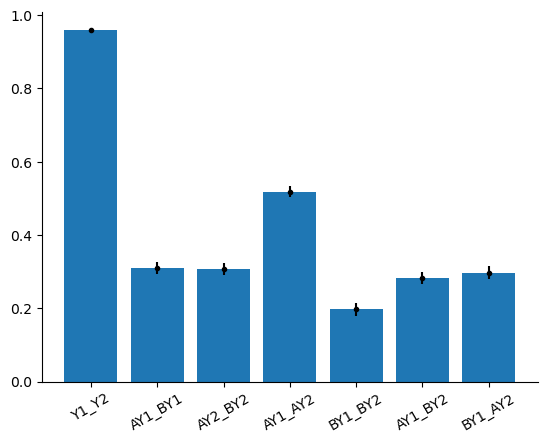

In [15]:
fig, ax = plt.subplots(1, 1)

ax.bar(np.arange(len(corr_list)), means)
ax.errorbar(np.arange(len(corr_list)), means, stes, fmt='.', color='k') 
ax.set_xticks(np.arange(len(corr_list)), labels=['Y1_Y2', 'AY1_BY1', 'AY2_BY2', 'AY1_AY2', 'BY1_BY2', 'AY1_BY2', 'BY1_AY2'], rotation=30) 
# ax.set_ylim([-0.05, 1.05]) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 

In [16]:
y1 = np.random.randn(N, P) @ M 
y2 = np.random.randn(N, P) @ M

AY1_AY2 = [] 
AY1_BY1 = [] 
AY1_BY2 = [] 
AY2_BY2 = []
BY1_BY2 = [] 
BY1_AY2 = []

In [17]:
for simI in np.arange(n_simulations):
    trial_types_A = np.random.randint(0, K1, N) 
    A = np.zeros((K1, N))
    for i in np.arange(K1): 
        A[i, trial_types_A == i] = 1
    A /= np.sum(A, axis=1, keepdims=True)

    trial_types_B = np.random.randint(0, K2, N) 
    B = np.zeros((K2, N))
    for i in np.arange(K2):
        B[i, trial_types_B == i] = 1 
    B /= np.sum(B, axis=1, keepdims=True)

    pattern_A1 = A @ y1 
    pattern_A2 = A @ y2 
    pattern_B1 = B @ y1 
    pattern_B2 = B @ y2

    pattern_A1 -= pattern_A1.mean(axis=0, keepdims=True)
    pattern_A2 -= pattern_A2.mean(axis=0, keepdims=True)
    pattern_B1 -= pattern_B1.mean(axis=0, keepdims=True)
    pattern_B2 -= pattern_B2.mean(axis=0, keepdims=True)

    topo_A1 = np.corrcoef(pattern_A1.T)
    topo_A2 = np.corrcoef(pattern_A2.T)
    topo_B1 = np.corrcoef(pattern_B1.T)
    topo_B2 = np.corrcoef(pattern_B2.T)

    topo_A1 = sqmat2vec(topo_A1)
    topo_A2 = sqmat2vec(topo_A2)
    topo_B1 = sqmat2vec(topo_B1)
    topo_B2 = sqmat2vec(topo_B2)

    AY1_AY2.append(np.corrcoef(topo_A1, topo_A2)[0, 1]) 
    AY1_BY1.append(np.corrcoef(topo_A1, topo_B1)[0, 1]) 
    AY1_BY2.append(np.corrcoef(topo_A1, topo_B2)[0, 1]) 
    AY2_BY2.append(np.corrcoef(topo_A2, topo_B2)[0, 1]) 
    BY1_BY2.append(np.corrcoef(topo_B1, topo_B2)[0, 1]) 
    BY1_AY2.append(np.corrcoef(topo_B1, topo_A2)[0, 1])

In [18]:
dP_sD = np.array([AY1_BY1, AY2_BY2])
sP_dD = np.array([AY1_AY2, BY1_BY2])
dP_dD = np.array([AY1_BY2, BY1_AY2])

In [19]:
dP_sD = dP_sD.mean(axis=0)
sP_dD = sP_dD.mean(axis=0)
dP_dD = dP_dD.mean(axis=0)

In [20]:
corr_list = [dP_sD, sP_dD, dP_dD]
means = [] 
stes = [] 

In [21]:
for i in np.arange(len(corr_list)):
    means.append(corr_list[i].mean())
    stes.append(corr_list[i].std()/np.sqrt(n_simulations)) 

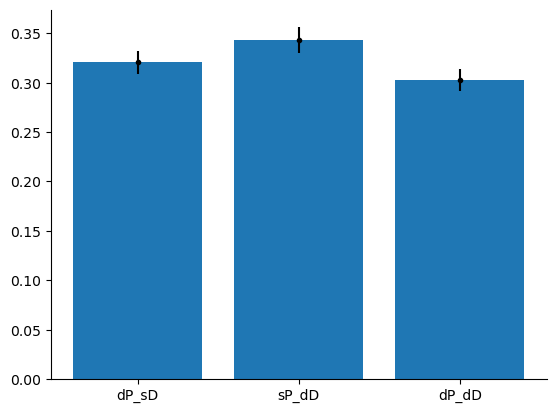

In [22]:
fig, ax = plt.subplots(1, 1)

ax.bar(np.arange(len(corr_list)), means)
ax.errorbar(np.arange(len(corr_list)), means, stes, fmt='.', color='k') 
ax.set_xticks(np.arange(len(corr_list)), labels=['dP_sD', 'sP_dD', 'dP_dD']) 
# ax.set_ylim([-0.05, 1.05]) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 

In [12]:
from scipy.stats import f_oneway

In [24]:
F = f_oneway(dP_sD, sP_dD, dP_dD)
F 

F_onewayResult(statistic=2.85675922463166, pvalue=0.06064976017064807)

In [13]:
AY1_AY2 = [] 
AY1_BY1 = [] 
AY1_BY2 = [] 
AY2_BY2 = []
BY1_BY2 = [] 
BY1_AY2 = [] 
no_projections = [] 

for simI in np.arange(n_simulations):
    sigma = 10 * np.random.randn(P, P) 
    sigma = sigma ** 2
    sigma = scipy.ndimage.gaussian_filter(sigma, 2)
    sigma = (sigma + sigma.T) / 2 
    M1 = np.real(scipy.linalg.sqrtm(sigma))

    sigma = 10 * np.random.randn(P, P) 
    sigma = sigma ** 2
    sigma = scipy.ndimage.gaussian_filter(sigma, 3)
    sigma = (sigma + sigma.T) / 2 
    M2 = np.real(scipy.linalg.sqrtm(sigma))

    trial_types_A = np.random.randint(0, K1, N) 
    A = np.zeros((K1, N))
    for i in np.arange(K1): 
        A[i, trial_types_A == i] = 1
    A /= np.sum(A, axis=1, keepdims=True)

    trial_types_B = np.random.randint(0, K2, N) 
    B = np.zeros((K2, N))
    for i in np.arange(K2):
        B[i, trial_types_B == i] = 1 
    B /= np.sum(B, axis=1, keepdims=True)

    
    y1 = np.random.randn(N, P) @ M1
    y2 = np.random.randn(N, P) @ M2

    # y1 = np.random.randn(N, P) 
    # y2 = np.random.randn(N, P)
    
    topo1 = np.corrcoef((y1 - y1.mean(axis=0, keepdims=True)).T) 
    topo2 = np.corrcoef((y2 - y2.mean(axis=0, keepdims=True)).T)  
    topo1 = sqmat2vec(topo1) 
    topo2 = sqmat2vec(topo2) 
    no_projections.append(np.corrcoef(topo1, topo2)[0, 1])

    pattern_A1 = A @ y1 
    pattern_A2 = A @ y2 
    pattern_B1 = B @ y1 
    pattern_B2 = B @ y2

    pattern_A1 -= pattern_A1.mean(axis=0, keepdims=True)
    pattern_A2 -= pattern_A2.mean(axis=0, keepdims=True)
    pattern_B1 -= pattern_B1.mean(axis=0, keepdims=True)
    pattern_B2 -= pattern_B2.mean(axis=0, keepdims=True)

    topo_A1 = np.corrcoef(pattern_A1.T)
    topo_A2 = np.corrcoef(pattern_A2.T)
    topo_B1 = np.corrcoef(pattern_B1.T)
    topo_B2 = np.corrcoef(pattern_B2.T)

    topo_A1 = sqmat2vec(topo_A1)
    topo_A2 = sqmat2vec(topo_A2)
    topo_B1 = sqmat2vec(topo_B1)
    topo_B2 = sqmat2vec(topo_B2)

    AY1_AY2.append(np.corrcoef(topo_A1, topo_A2)[0, 1]) 
    AY1_BY1.append(np.corrcoef(topo_A1, topo_B1)[0, 1]) 
    AY1_BY2.append(np.corrcoef(topo_A1, topo_B2)[0, 1]) 
    AY2_BY2.append(np.corrcoef(topo_A2, topo_B2)[0, 1]) 
    BY1_BY2.append(np.corrcoef(topo_B1, topo_B2)[0, 1]) 
    BY1_AY2.append(np.corrcoef(topo_B1, topo_A2)[0, 1]) 

In [14]:
AY1_AY2 = np.array(AY1_AY2) 
AY1_BY1 = np.array(AY1_BY1) 
AY1_BY2 = np.array(AY1_BY2) 
AY2_BY2 = np.array(AY2_BY2) 
BY1_BY2 = np.array(BY1_BY2) 
BY1_AY2 = np.array(BY1_AY2) 
no_projections = np.array(no_projections) 

AY1_AY2 

array([ 0.00686538,  0.00747625,  0.28028501,  0.22190621, -0.00234475,
        0.33477975,  0.18106971,  0.01076975, -0.02423338, -0.08659086,
        0.21734842, -0.03985677,  0.10717768, -0.00845764,  0.18456509,
        0.21495984,  0.34740118,  0.20091601,  0.19429416,  0.10565653,
       -0.13971542,  0.2796847 ,  0.02722626,  0.15996296,  0.16772217,
        0.08616397,  0.07606341,  0.09689024,  0.12322777,  0.14067416,
       -0.00047583,  0.01141375,  0.05418753,  0.18897366,  0.059527  ,
        0.41565634,  0.14336042, -0.03658426,  0.12272563,  0.19607351,
        0.18179861,  0.19608692,  0.13870479,  0.09880485,  0.27858202,
        0.21368616,  0.1599719 ,  0.23441908,  0.35055539, -0.07198951])

In [15]:
corr_list = [no_projections, AY1_BY1, AY2_BY2, AY1_AY2, BY1_BY2, AY1_BY2, BY1_AY2] 

means = [] 
stes = [] 
for i in np.arange(len(corr_list)):
    means.append(np.mean(corr_list[i])) 
    stes.append(np.std(corr_list[i])/np.sqrt(n_simulations)) 

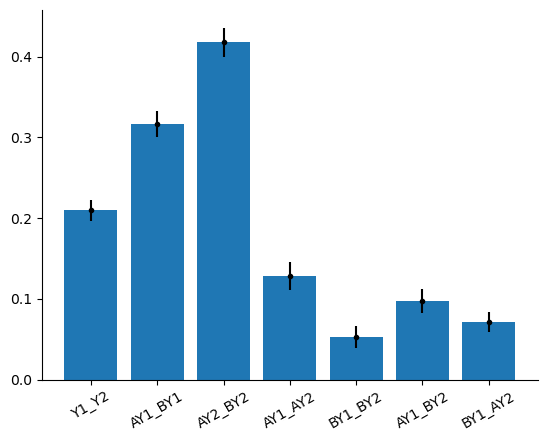

In [16]:
fig, ax = plt.subplots(1, 1)

ax.bar(np.arange(len(corr_list)), means)
ax.errorbar(np.arange(len(corr_list)), means, stes, fmt='.', color='k') 
ax.set_xticks(np.arange(len(corr_list)), labels=['Y1_Y2', 'AY1_BY1', 'AY2_BY2', 'AY1_AY2', 'BY1_BY2', 'AY1_BY2', 'BY1_AY2'], rotation=30) 
# ax.set_ylim([-0.05, 1.05]) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 

In [17]:
y1 = np.random.randn(N, P) @ M1
y2 = np.random.randn(N, P) @ M2 

AY1_AY2 = [] 
AY1_BY1 = [] 
AY1_BY2 = [] 
AY2_BY2 = []
BY1_BY2 = [] 
BY1_AY2 = []

In [18]:
for simI in np.arange(n_simulations):
    trial_types_A = np.random.randint(0, K1, N) 
    A = np.zeros((K1, N))
    for i in np.arange(K1): 
        A[i, trial_types_A == i] = 1
    A /= np.sum(A, axis=1, keepdims=True)

    trial_types_B = np.random.randint(0, K2, N) 
    B = np.zeros((K2, N))
    for i in np.arange(K2):
        B[i, trial_types_B == i] = 1 
    B /= np.sum(B, axis=1, keepdims=True)

    pattern_A1 = A @ y1 
    pattern_A2 = A @ y2 
    pattern_B1 = B @ y1 
    pattern_B2 = B @ y2

    pattern_A1 -= pattern_A1.mean(axis=0, keepdims=True)
    pattern_A2 -= pattern_A2.mean(axis=0, keepdims=True)
    pattern_B1 -= pattern_B1.mean(axis=0, keepdims=True)
    pattern_B2 -= pattern_B2.mean(axis=0, keepdims=True)

    topo_A1 = np.corrcoef(pattern_A1.T)
    topo_A2 = np.corrcoef(pattern_A2.T)
    topo_B1 = np.corrcoef(pattern_B1.T)
    topo_B2 = np.corrcoef(pattern_B2.T)

    topo_A1 = sqmat2vec(topo_A1)
    topo_A2 = sqmat2vec(topo_A2)
    topo_B1 = sqmat2vec(topo_B1)
    topo_B2 = sqmat2vec(topo_B2)

    AY1_AY2.append(np.corrcoef(topo_A1, topo_A2)[0, 1]) 
    AY1_BY1.append(np.corrcoef(topo_A1, topo_B1)[0, 1]) 
    AY1_BY2.append(np.corrcoef(topo_A1, topo_B2)[0, 1]) 
    AY2_BY2.append(np.corrcoef(topo_A2, topo_B2)[0, 1]) 
    BY1_BY2.append(np.corrcoef(topo_B1, topo_B2)[0, 1]) 
    BY1_AY2.append(np.corrcoef(topo_B1, topo_A2)[0, 1])

In [19]:
dP_sD = np.array([AY1_BY1, AY2_BY2])
sP_dD = np.array([AY1_AY2, BY1_BY2])
dP_dD = np.array([AY1_BY2, BY1_AY2])

In [20]:
dP_sD = dP_sD.mean(axis=0)
sP_dD = sP_dD.mean(axis=0)
dP_dD = dP_dD.mean(axis=0)

In [21]:
# topography consistency between Y1 and Y2 without projections 
topo1 = np.corrcoef(y1.T) 
topo1 = sqmat2vec(topo1) 
topo2 = np.corrcoef(y2.T) 
topo2 = sqmat2vec(topo2) 

consistency_12 = np.array([np.corrcoef(topo1, topo2)[0, 1]])

In [25]:
np.corrcoef(topo1, topo2)[0, 1] 

0.022580173446231918

In [31]:
np.corrcoef(M1.flatten(), M2.flatten())[0, 1] 

0.3387678565716303

In [26]:
corr_list = [consistency_12, dP_sD, sP_dD, dP_dD]
means = [] 
stes = [] 

In [27]:
for i in np.arange(len(corr_list)):
    means.append(corr_list[i].mean())
    stes.append(corr_list[i].std()/np.sqrt(n_simulations)) 

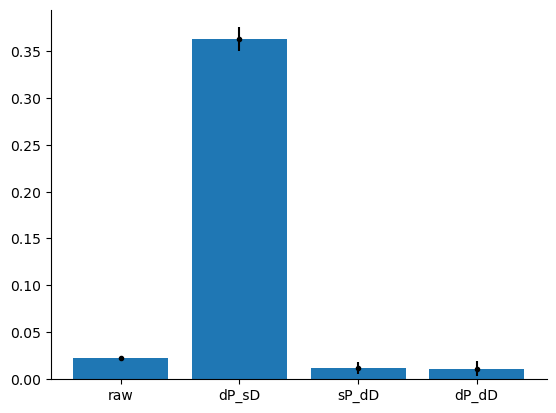

In [28]:
fig, ax = plt.subplots(1, 1)

ax.bar(np.arange(len(corr_list)), means)
ax.errorbar(np.arange(len(corr_list)), means, stes, fmt='.', color='k') 
ax.set_xticks(np.arange(len(corr_list)), labels=['raw', 'dP_sD', 'sP_dD', 'dP_dD']) 
# ax.set_ylim([-0.05, 1.05]) 
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False) 

In [29]:
F = f_oneway(sP_dD, dP_dD)
F 

F_onewayResult(statistic=0.0021877730243618633, pvalue=0.9627888261236732)